## **Airbnb EDA Project by Viplav Patwardhan

## **Breakdown of this Notebook:**

1.**Importing Libraries**

2.**Loading the dataset**

3.**Data Cleaning:**

*   Dropping duplicates.
*   Cleaning individual columns.
*   Remove the Null values from the dataset
*   Some Transformations

4.**Data Analysis and Visualization:** Using plots to find relations between the features

* What is the average preferred price by customers according to the location?

* Number of active hosts per location (Where most of the hosts focused to own  property?)

* Where the customer pays the highest and lowest rent according to location?

* Find the total count of each room type

* Room types and their relation with availability in different neighbourhood groups


* Find top 10 hosts with most listings

* Find the top three hosts based on their turnover

* Find total no. of nights spend per location

* Total no. of nights spends per room types






In [ ]:
#import all library that will be used in entire project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7)
import seaborn as sns

In [ ]:
#File path of Airbnb dataset in google drive

df = pd.read_csv('/content/AB_NYC_2019.csv')

In [ ]:
#Information about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Remove latitude, longitude, last_review and reviews_per_month columns from original dataset
df.drop(df.columns[[6,7,12,13]], axis=1, inplace=True)

In [ ]:
#we apply dropna() function to entire dataset and drop null values with dropna() function
airbnb_df = df.dropna()

In [ ]:
#Information about our new non null dataframe
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id                              48858 non-null  int64 
 1   name                            48858 non-null  object
 2   host_id                         48858 non-null  int64 
 3   host_name                       48858 non-null  object
 4   neighbourhood_group             48858 non-null  object
 5   neighbourhood                   48858 non-null  object
 6   room_type                       48858 non-null  object
 7   price                           48858 non-null  int64 
 8   minimum_nights                  48858 non-null  int64 
 9   number_of_reviews               48858 non-null  int64 
 10  calculated_host_listings_count  48858 non-null  int64 
 11  availability_365                48858 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 4.8+ MB


In [ ]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [ ]:
#Brief information about numerical column in our dataset
airbnb_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [ ]:
#Sum of null values in dataset
airbnb_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

#1.What is the average preferred price by customers according to the location?

In [ ]:
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [ ]:
#Average_price of property according to the location
avg_preffered_price_df = airbnb_df.groupby(['neighbourhood_group','room_type'], as_index=False)['price'].mean().rename(columns={'neighbourhood_group':'Location','price':'Average Price'})
avg_preffered_price_df

,Location,room_type,Average Price
0,Bronx,Entire home/apt,127.645503
1,Bronx,Private room,66.788344
2,Bronx,Shared room,58.610169
3,Brooklyn,Entire home/apt,178.362609
4,Brooklyn,Private room,76.510619
5,Brooklyn,Shared room,50.527845
6,Manhattan,Entire home/apt,249.238211
7,Manhattan,Private room,116.805594
8,Manhattan,Shared room,88.977083
9,Queens,Entire home/apt,147.050573


In [ ]:
#Unstack the group by information for plot the graph
avg_preffered_price_df = airbnb_df.groupby(['neighbourhood_group','room_type'])['price'].mean().unstack()
avg_preffered_price_df

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.645503,66.788344,58.610169
Brooklyn,178.362609,76.510619,50.527845
Manhattan,249.238211,116.805594,88.977083
Queens,147.050573,71.776855,69.020202
Staten Island,173.846591,62.292553,57.444444


<Axes: xlabel='neighbourhood_group'>

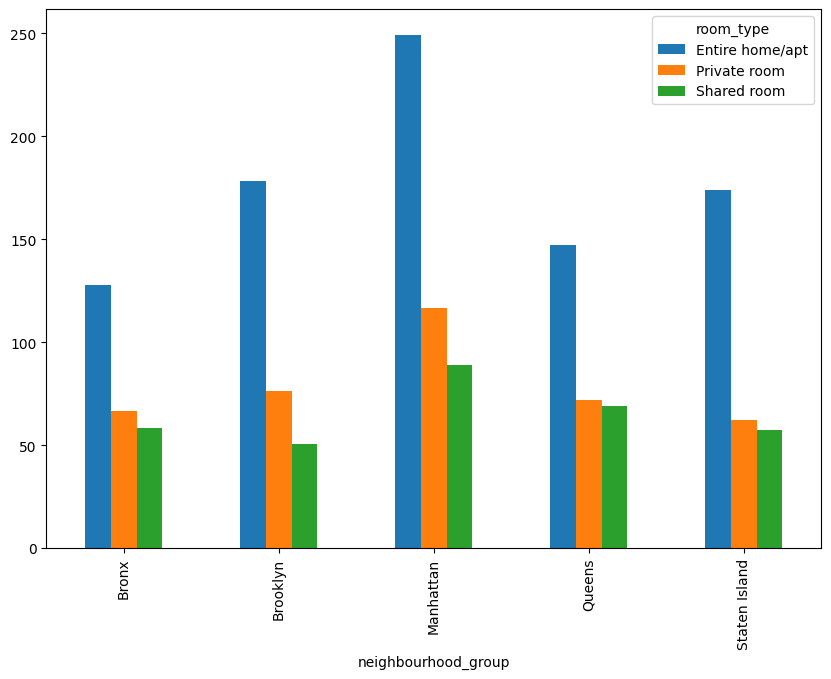

In [ ]:
#Graph of average price of property according to location
avg_preffered_price_df.plot.bar()

#2. No. of active host per location (Where most of the host focused to own property)

In [ ]:
#Apply group by operation on neighbourhood_group for find the number of host according to location
no_of_host_per_location = airbnb_df.groupby('neighbourhood_group',as_index=False)['host_id'].count().sort_values(['host_id'], ascending=False).rename(columns={'neighbourhood_group':'Location','host_id':'Host'})
no_of_host_per_location

,Location,Host
2,Manhattan,21643
1,Brooklyn,20089
3,Queens,5664
0,Bronx,1089
4,Staten Island,373


#Answer: Manhattan is most focused place for host to do their business


In [ ]:
#Take a simple format of above question without index for plot the line chart
no_of_host_per_location = airbnb_df.groupby('neighbourhood_group')['host_id'].count()
no_of_host_per_location

neighbourhood_group
Bronx             1089
Brooklyn         20089
Manhattan        21643
Queens            5664
Staten Island      373
Name: host_id, dtype: int64

Text(0.5, 0, 'Location')

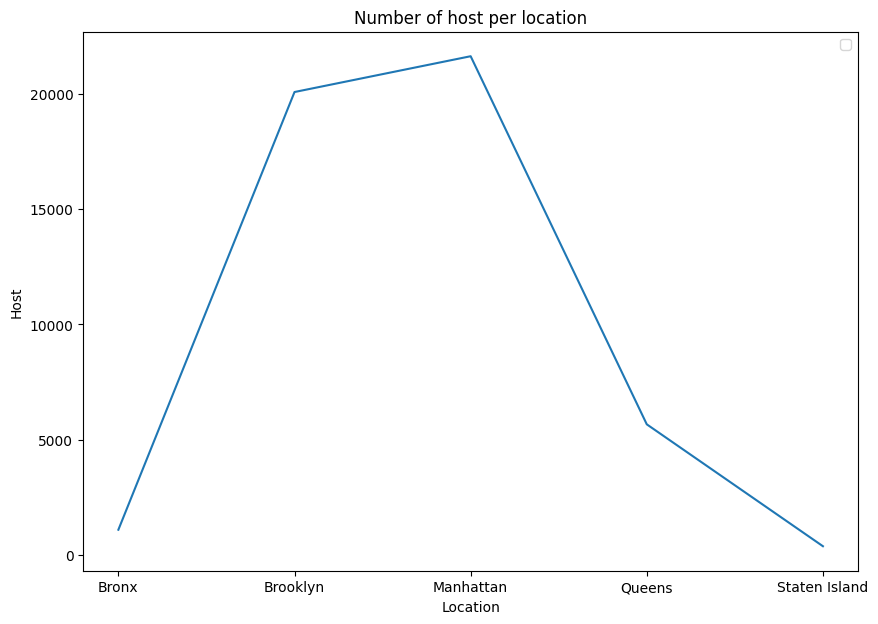

In [ ]:
#Graph
plt.legend(labels = ['No. of Host'])
plt.plot(no_of_host_per_location)
plt.title('Number of host per location')
plt.ylabel('Host')
plt.xlabel('Location')

In [ ]:
airbnb_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,152.740309,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.232386,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


#Points to be noted:

1. Here we can see that there is minimum price 0$.We have to fix it anyway because Airbnb is not provide free stay in any hotel.  
Solution: For that we check where the price is 0. We create one funtion in which as per minimum nights the price will be set as per formula [Refer below cells for more detail]

2. There are some entries in dataset in which minimum nights = 1 but it's respective price is 0
 Solution: We replace the price value with the mean value of price which amount is less than 100$. [Refer below cells for more detail]








In [ ]:
#identify the observations where minimum nights is 1 and price is minimum
airbnb_df[airbnb_df['minimum_nights'] ==1].sort_values(['price', 'minimum_nights'], ascending=[True, True])

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
25794,20639628,Spacious comfortable master bedroom with nice ...,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,93,6,176
25795,20639792,Contemporary bedroom in brownstone with nice view,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,232
25796,20639914,Cozy yet spacious private brownstone bedroom,86327101,Adeyemi,Brooklyn,Bedford-Stuyvesant,Private room,0,1,95,6,222
21700,17437106,Couch in Harlem Harvey Refugees only,33511962,Morgan,Manhattan,Harlem,Shared room,10,1,0,1,0
22835,18490141,IT'S SIMPLY CONVENIENT!,97001292,Maria,Queens,Jamaica,Entire home/apt,10,1,43,1,252
...,...,...,...,...,...,...,...,...,...,...,...,...
44034,33998396,3000 sq ft daylight photo studio,3750764,Kevin,Manhattan,Chelsea,Entire home/apt,6800,1,0,6,364
42523,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,Entire home/apt,7500,1,0,1,364
45666,34895693,Gem of east Flatbush,262534951,Sandra,Brooklyn,East Flatbush,Private room,7500,1,8,2,179
29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,Entire home/apt,7703,1,0,12,146


In [ ]:
#Get the number of values which price is less than 100$
airbnb_df.loc[airbnb_df['price'] < 100,'price'].count()

21861

In [ ]:
#Make a copy of original dataframe to perform additional operation for get the desire result
airbnb_price_df = airbnb_df.copy()

In [ ]:
#Find the mean value of price which value is less than 100$
round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean())

65

In [ ]:
#Change the value of price where minimum night = 1 and price of their property is less than 50$
airbnb_price_df['price'] = np.where(
   (airbnb_price_df['price'] <= 50) & (airbnb_price_df['minimum_nights'] == 1) ,round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean()) , airbnb_price_df['price']
   )

In [ ]:
#still 8 rows have amount = 0$
airbnb_price_df[airbnb_price_df['price']==0].count()

id                                8
name                              8
host_id                           8
host_name                         8
neighbourhood_group               8
neighbourhood                     8
room_type                         8
price                             8
minimum_nights                    8
number_of_reviews                 8
calculated_host_listings_count    8
availability_365                  8
dtype: int64

In [ ]:
#Find the observations where price is 0$
airbnb_price_df[airbnb_price_df['price']==0]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,Private room,0,4,1,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,Private room,0,2,55,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,Private room,0,2,16,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,Private room,0,2,12,2,0
25778,20624541,Modern apartment in the heart of Williamsburg,10132166,Aymeric,Brooklyn,Williamsburg,Entire home/apt,0,5,3,1,73
26259,20933849,the best you can find,13709292,Qiuchi,Manhattan,Murray Hill,Entire home/apt,0,3,0,1,0
26841,21291569,Coliving in Brooklyn! Modern design / Shared room,101970559,Sergii,Brooklyn,Bushwick,Shared room,0,30,2,6,333
26866,21304320,Best Coliving space ever! Shared room.,101970559,Sergii,Brooklyn,Bushwick,Shared room,0,30,5,6,139


In [ ]:
#Function that gives a new price according to minimum night
def price_calculator(min_night):
  '''Get the price based on the minimum night you are given'''
  mean_price = round(airbnb_df.loc[airbnb_df['price'] < 100,'price'].mean())
  new_price = mean_price * min_night

  return new_price

In [ ]:
#Replace the value of price according to minimum night where price = 0$
airbnb_price_df['price'] = np.where(
   (airbnb_price_df['price'] == 0) ,price_calculator(airbnb_price_df['minimum_nights']) , airbnb_price_df['price'])

In [ ]:
#Our new description of dataset
airbnb_price_df.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.885800e+04,4.885800e+04,48858.000000,48858.000000,48858.000000,48858.000000,48858.000000
mean,1.902335e+07,6.763169e+07,153.846801,7.012444,23.273098,7.148369,112.801425
std,1.098289e+07,7.862389e+07,240.078850,20.019757,44.549898,32.964600,131.610962
min,2.539000e+03,2.438000e+03,10.000000,1.000000,0.000000,1.000000,0.000000
25%,9.475980e+06,7.818669e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.969114e+07,3.079133e+07,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915765e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,365.000000


#3.Where the customer pays the highest and lowest rent according  to location

In [ ]:
#Get the highest rent according to location
max_price_df = airbnb_price_df.groupby('neighbourhood_group',as_index=False)['price'].max().sort_values(['price'],ascending = False).rename(columns = {'price':'Maximum price','neighbourhood_group':'Location'})
max_price_df

,Location,Maximum price
1,Brooklyn,10000
2,Manhattan,10000
3,Queens,10000
4,Staten Island,5000
0,Bronx,2500


In [ ]:
#Get the lowest rent according to location
min_price_df = airbnb_price_df.groupby('neighbourhood_group',as_index=False)['price'].min().sort_values(['price'],ascending = True).rename(columns = {'price':'Minimum price','neighbourhood_group':'Location'})
min_price_df

,Location,Minimum price
1,Brooklyn,10
2,Manhattan,10
3,Queens,10
0,Bronx,20
4,Staten Island,20


In [ ]:
#Get the combine dataframe of minimum and maximum price according to location
merge_price_df = pd.merge(max_price_df, min_price_df, on='Location')
merge_price_df

,Location,Maximum price,Minimum price
0,Brooklyn,10000,10
1,Manhattan,10000,10
2,Queens,10000,10
3,Staten Island,5000,20
4,Bronx,2500,20


In [ ]:
#Create a copy of merge price dataframe
merge_price_df_copy = merge_price_df.copy()

In [ ]:
#Create a function for log transformation of maximum price and minimum price
def log_values(values):
  '''This function takes a price value as a input and give it's log values'''
  new_max_price = np.log2(values)

  return new_max_price

In [ ]:
#Apply above function on merge price dataframe
merge_price_df_copy['Maximum price'] = merge_price_df_copy.apply(lambda x: log_values(x['Maximum price']), axis=1)
merge_price_df_copy['Minimum price'] = merge_price_df_copy.apply(lambda x: log_values(x['Minimum price']), axis=1)

In [ ]:
#Output of maximum price and minimum price after log transformation
merge_price_df_copy

,Location,Maximum price,Minimum price
0,Brooklyn,13.287712,3.321928
1,Manhattan,13.287712,3.321928
2,Queens,13.287712,3.321928
3,Staten Island,12.287712,4.321928
4,Bronx,11.287712,4.321928


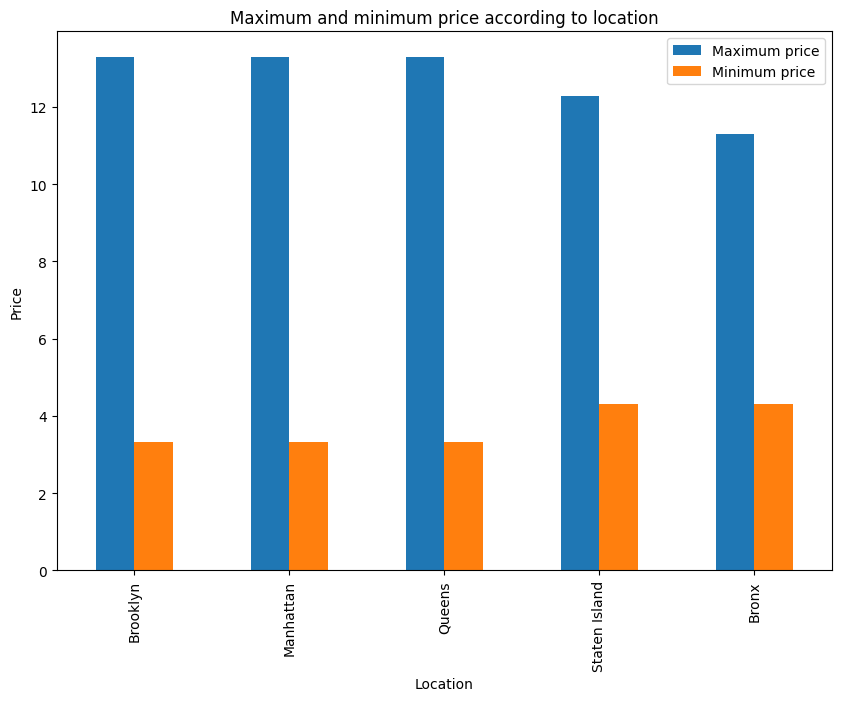

In [ ]:
#Bar graph for display maximum price and minimum price according to location
merge_price_df_copy.plot(x="Location", y=['Maximum price', 'Minimum price'], kind="bar")

# Customizing the plot
plt.legend(labels=['Maximum price', 'Minimum price'])
plt.title('Maximum and minimum price according to location')
plt.ylabel('Price')

# Displaying the plot
plt.show()

# Answering following Questions:
* Find the total count of each room type

* Which are the top 25 most used words in listing names?

* Find top 10 hosts with most listings


In [ ]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# Importing data by reading csv file

airbnb_df=pd.read_csv('/content/AB_NYC_2019.csv')

In [ ]:
#Understanding the Data
airbnb_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Cleaning the Data

In [ ]:
#Removing the Duplicates if any
airbnb_df.duplicated().sum()
airbnb_df.drop_duplicates(inplace=True)
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
# Drop null observations
airbnb_non_null_df = airbnb_df.dropna()

### Finding Total count of each room types

In [ ]:
# Finding unique values from column 'room_type'
airbnb_room_type = airbnb_df.room_type.unique()

In [ ]:
airbnb_room_type

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [ ]:
# Which is the most listed room type?
airbnb_roomtype_frequency = dict(airbnb_df.room_type.value_counts())

In [ ]:
airbnb_roomtype_frequency

{'Entire home/apt': 25409, 'Private room': 22326, 'Shared room': 1160}

Text(0.5, 1.0, 'Count of Listed Rooms')

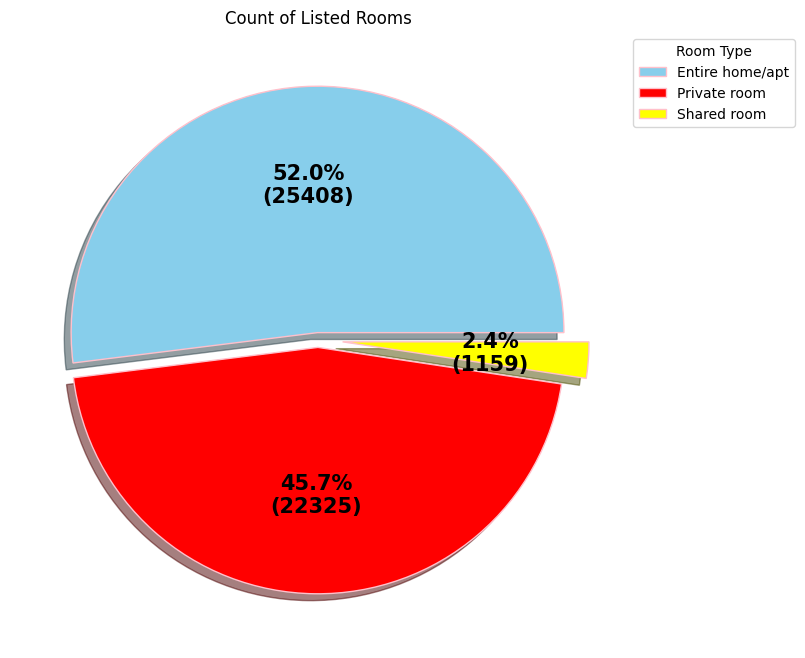

In [ ]:
# Creating Dataset

room_type = list(airbnb_roomtype_frequency.keys())
data = list(airbnb_roomtype_frequency.values())

# Creating color parameters

colors = ( "skyblue", "red", "yellow",)

# Creating explode data

explode = (0.03, 0.03, 0.1)

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "pink" }

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating Pie Chart

# Creating plot
fig, airbnb_pie_chart = plt.subplots(figsize =(12, 8))
wedges, texts, autotexts = airbnb_pie_chart.pie(data, autopct = lambda pct: func(pct, data),
                                                explode = explode,
                                                shadow = True,
                                                colors = colors,
                                                startangle = 0,
                                                wedgeprops = wp,
                                                textprops = dict(color ="black"))

# Adding legend
airbnb_pie_chart.legend(wedges, room_type,
                        title ="Room Type",
                        loc ="upper left",
                        bbox_to_anchor=(1, 0., 0.,1))

plt.setp(autotexts, size = 15, weight = "bold")
airbnb_pie_chart.set_title("Count of Listed Rooms")




#Finding Relation between neighbourhood group and availability of rooms

[Text(0, 0, 'Brooklyn'),
 Text(1, 0, 'Manhattan'),
 Text(2, 0, 'Queens'),
 Text(3, 0, 'Staten Island'),
 Text(4, 0, 'Bronx')]

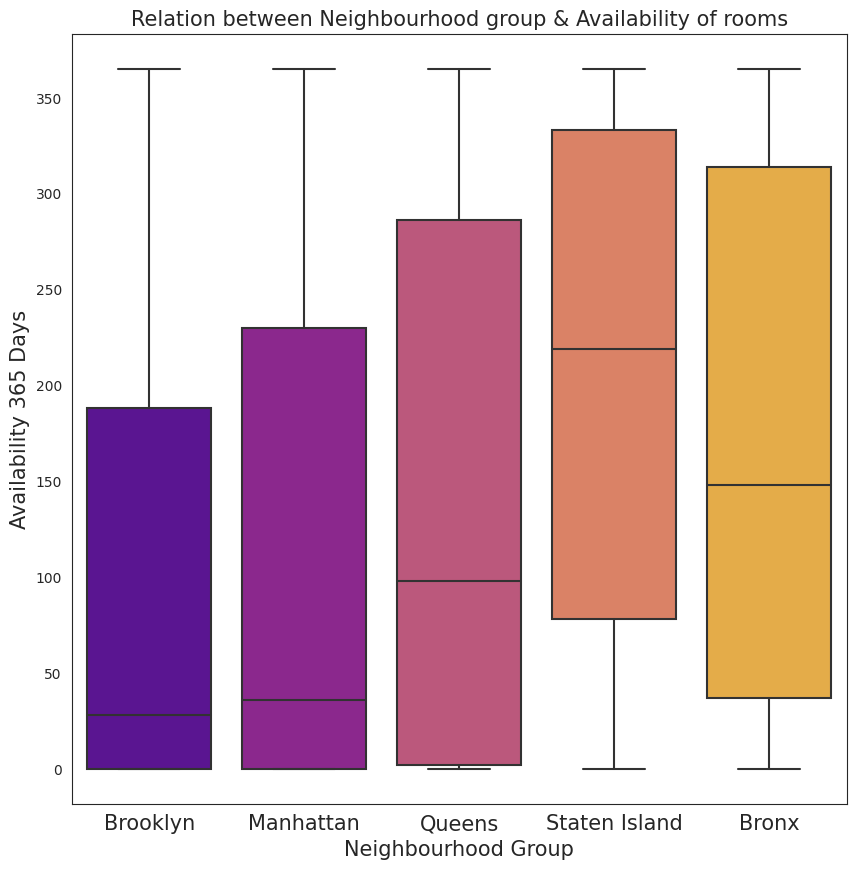

In [ ]:
plt.figure(figsize=(10,10))
sns.set_style('white')

ax = sns.boxplot(data=airbnb_df, x='neighbourhood_group',y='availability_365',palette='plasma')

# Naming the Chart
ax.set_title('Relation between Neighbourhood group & Availability of rooms').set_fontsize('15')

# Naming X & Y axis
ax.set_ylabel('Availability 365 Days').set_fontsize('15')
ax.set_xlabel('Neighbourhood Group').set_fontsize('15')

#Adjusting Bar labels
ax.set_xticklabels(ax.get_xticklabels(), size = '15')

## Finding Top 10 Listing Counts

In [ ]:
airbnb_df['host_id'].count()

48895

In [ ]:
#Creating DataFrame
count_host_id = list(airbnb_df['host_id'].value_counts())
host_id = list(airbnb_df.host_id)
listing_count= list(zip(host_id,count_host_id))
count_host_id_df= pd.DataFrame(listing_count)
count_host_id_df.rename(columns={0:'Host_Id',1:'Counts'},inplace=True)

#Storing top 10 hosts with most listings
top_host_id = count_host_id_df.head(10)
top_host_id

,Host_Id,Counts
0,2787,327
1,2845,232
2,4632,121
3,4869,103
4,7192,96
5,7322,96
6,7356,91
7,8967,87
8,7490,65
9,7549,52


[Text(0, 0, '2787'),
 Text(1, 0, '2845'),
 Text(2, 0, '4632'),
 Text(3, 0, '4869'),
 Text(4, 0, '7192'),
 Text(5, 0, '7322'),
 Text(6, 0, '7356'),
 Text(7, 0, '8967'),
 Text(8, 0, '7490'),
 Text(9, 0, '7549')]

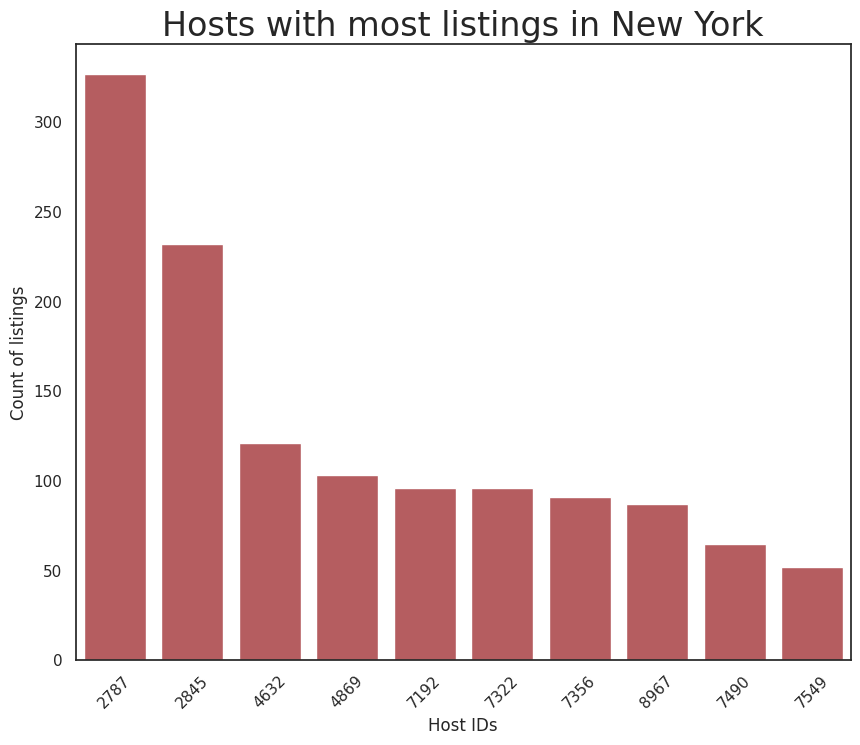

In [ ]:
#Setting the figure size
sns.set(rc={'figure.figsize':(10,8)})

#Setting background colour of chart as white
sns.set_style('white')

#Plotting the Chart
viz_bar = sns.barplot(x= 'Host_Id', y= 'Counts', color='r', data=top_host_id,
                      order=top_host_id.sort_values('Counts',ascending = False).Host_Id)

#Setting font size for title
sns.set(font_scale = 2)

# Naming the Chart
viz_bar.set_title('Hosts with most listings in New York')

# Naming X & Y axis
viz_bar.set_xlabel('Host IDs')
viz_bar.set_ylabel('Count of listings')

#Adjusting Bar labels
viz_bar.set_xticklabels(viz_bar.get_xticklabels(), rotation=45)


# Answering following Questions:
* Find the top three hosts based on their turnover

* Find total no. of nights spend per location

* Total no. of nights spends per room types

* Top 10 highest listing neighborhood


In [ ]:
# Import pandas and numpy package
# Importing matplotlib.pyplot and seaborn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# after removing last_review , reviews_per_month columns
airbnb_df.drop(['last_review', 'reviews_per_month'], axis = 1,inplace=True)

In [ ]:
#find any dupicated value
airbnb_df.duplicated().sum()

0

In [ ]:
# drop null value from the dataset
non_null_file = airbnb_df.dropna()
non_null_file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48858 non-null  int64  
 1   name                            48858 non-null  object 
 2   host_id                         48858 non-null  int64  
 3   host_name                       48858 non-null  object 
 4   neighbourhood_group             48858 non-null  object 
 5   neighbourhood                   48858 non-null  object 
 6   latitude                        48858 non-null  float64
 7   longitude                       48858 non-null  float64
 8   room_type                       48858 non-null  object 
 9   price                           48858 non-null  int64  
 10  minimum_nights                  48858 non-null  int64  
 11  number_of_reviews               48858 non-null  int64  
 12  calculated_host_listings_count  

# Which are the top three hosts based on their turnover?

In [ ]:
# copy of the non_null_file
new=non_null_file.copy()
new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [ ]:
# replace whose price less than 50
new.loc[new['price']<50,'price'] = new.loc[(new['price']>50) & (new['price']<80),'price'].median()
new['price'].describe()

count    48858.000000
mean       155.369008
std        239.104348
min         50.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [ ]:
# after removing price less than 100
new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [ ]:
#  find the maximum price across different host name
top_host=new.groupby(['host_name','host_id'])['price'].sum().reset_index()
top_host.rename(columns={'price':'total_price'},inplace=True)
top_host.head()
#top_host.info()

,host_name,host_id,total_price
0,'Cil,45354224,120
1,(Ari) HENRY LEE,40605120,140
2,(Email hidden by Airbnb),5610823,261
3,(Email hidden by Airbnb),7580102,389
4,(Email hidden by Airbnb),11495251,200


In [ ]:
# find top three host best on their turnover
top_3=top_host.sort_values('total_price',ascending=False).iloc[:3,:3]
top_3

,host_name,host_id,total_price
33209,Sonder (NYC),219517861,82795
4856,Blueground,107434423,70331
31216,Sally,156158778,37097


[Text(0, 0, 'Sonder (NYC)'), Text(1, 0, 'Blueground'), Text(2, 0, 'Sally')]

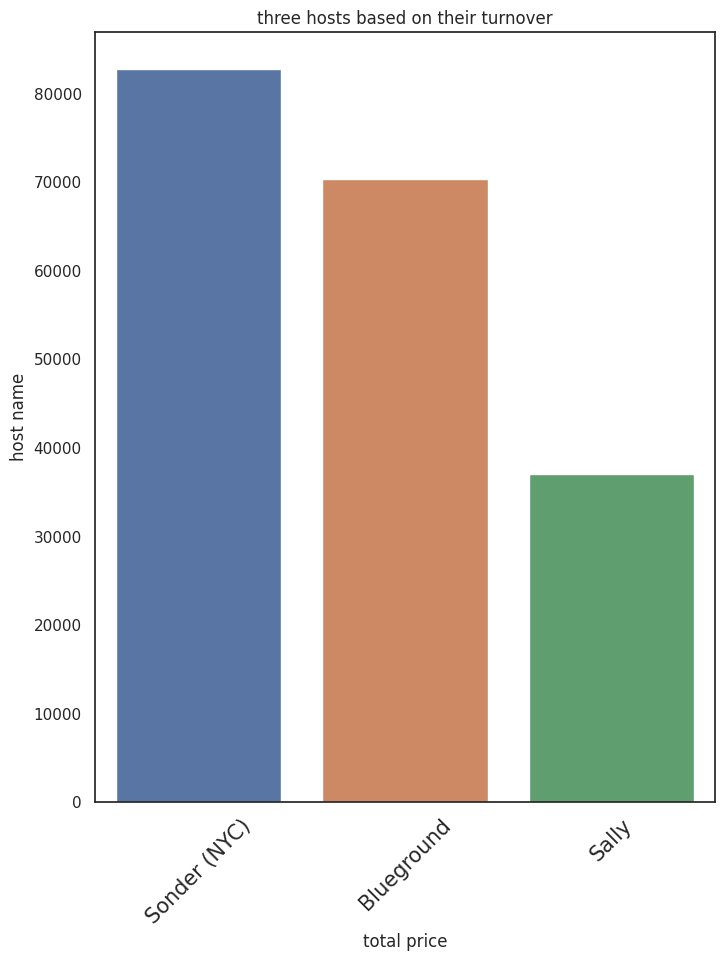

In [ ]:
sns.set(rc={'figure.figsize':(8,10)})
sns.set_style('white')
abc= sns.barplot(x='host_name',y='total_price',data = top_3)
abc.set_title('three hosts based on their turnover')
abc.set_ylabel('host name')
abc.set_xlabel('total price')

abc.set_xticklabels(abc.get_xticklabels(),rotation = 45,size='15')

# Find total no. nights spend per location

In [ ]:
#  find the maximum(minimum nights) spending by customer across different neighourhood group
total_nights=new.groupby('neighbourhood_group')['minimum_nights'].sum().reset_index()
final_nights=total_nights.sort_values('minimum_nights',ascending=True)
final_nights.head()

,neighbourhood_group,minimum_nights
4,Staten Island,1802
0,Bronx,4971
3,Queens,29356
1,Brooklyn,121693
2,Manhattan,184792


[Text(0, 0, 'Staten Island'),
 Text(1, 0, 'Bronx'),
 Text(2, 0, 'Queens'),
 Text(3, 0, 'Brooklyn'),
 Text(4, 0, 'Manhattan')]

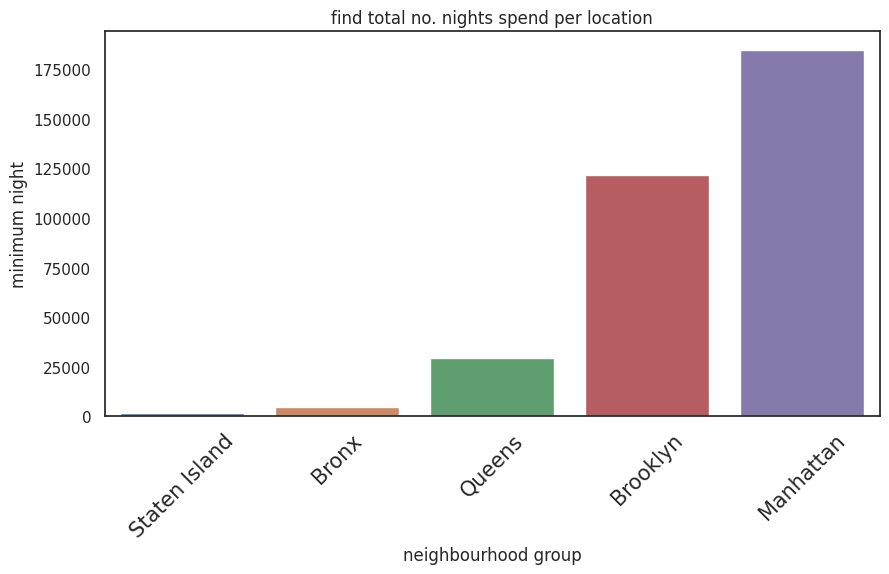

In [ ]:
# visualization of total no. nights spend per location using seaborn
sns.set(rc={'figure.figsize':(10,5)})
sns.set_style('white')
abc= sns.barplot(x='neighbourhood_group',y='minimum_nights',data = final_nights)
abc.set_title('find total no. nights spend per location')
abc.set_ylabel('minimum night')
abc.set_xlabel('neighbourhood group')

abc.set_xticklabels(abc.get_xticklabels(),rotation = 45,size='15')

# Total no. of nights spend per room types


In [ ]:
# find unique value of room types
list(new['room_type'].unique())

['Private room', 'Entire home/apt', 'Shared room']

In [ ]:
#  find the maximum(minimum nights) spending by customer across different room type
total_room=new.groupby(  'room_type')['minimum_nights'].sum().reset_index()
room_types=total_room.sort_values('minimum_nights',ascending=True)
room_types.head()

,room_type,minimum_nights
2,Shared room,7510
1,Private room,120023
0,Entire home/apt,215081


In [ ]:
# create dataset
labels=list(room_types['room_type'])
sizes=list(room_types['minimum_nights'])
# create color parameter
colors=['green','pink','yellow']
# create explode
explode = (0.07, 0.07, 0.07)

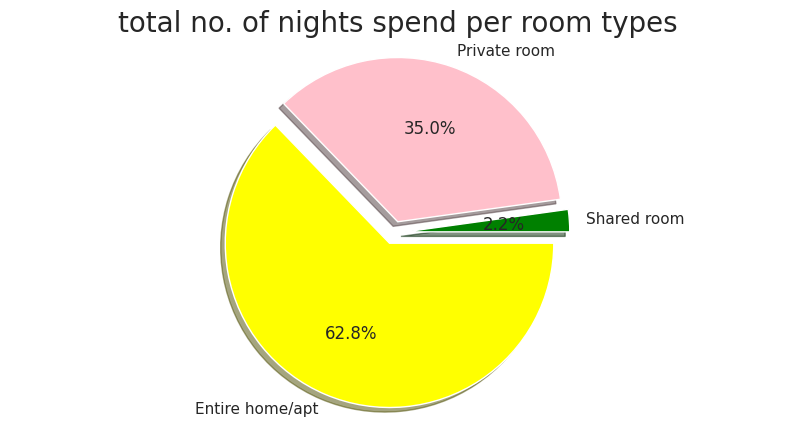

In [ ]:
#creating pie chart
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True)
plt.title('total no. of nights spend per room types', fontsize=20)
plt.axis("equal")
plt.show()

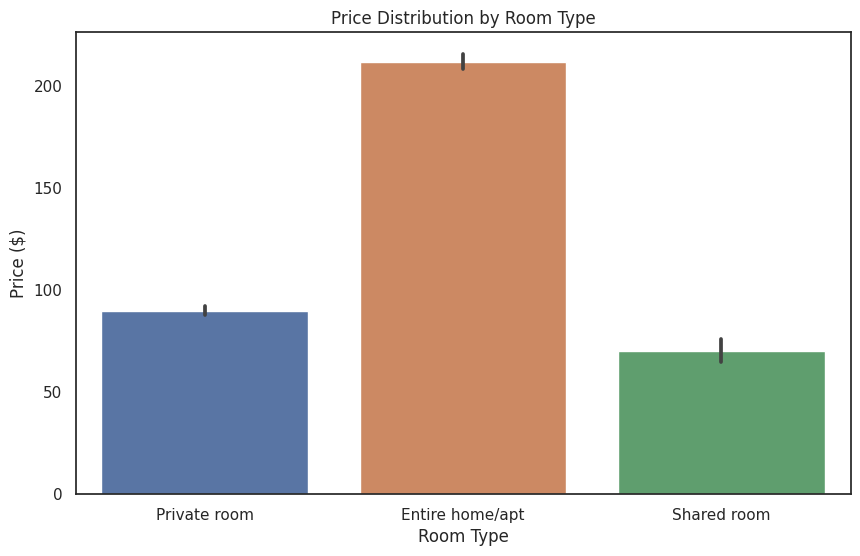

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='room_type', y='price')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.title('Price Distribution by Room Type')
plt.show()


<Figure size 1200x600 with 0 Axes>

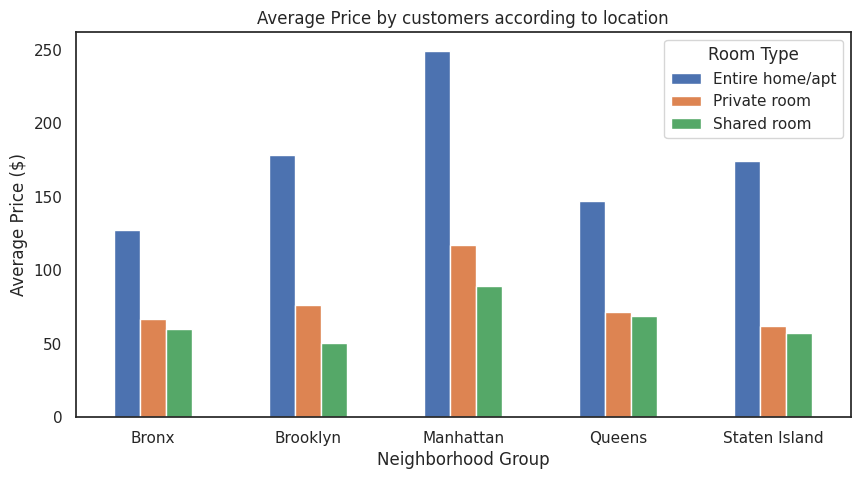

In [ ]:
avg_price_by_group_type = df.groupby(['neighbourhood_group', 'room_type'])['price'].mean().unstack()

# Plot the average price of properties by neighborhood group and room type
plt.figure(figsize=(12, 6))
avg_price_by_group_type.plot(kind='bar')
plt.xlabel('Neighborhood Group')
plt.ylabel('Average Price ($)')
plt.title('Average Price by customers according to location')
plt.legend(title='Room Type')
plt.xticks(rotation=0)
plt.show()

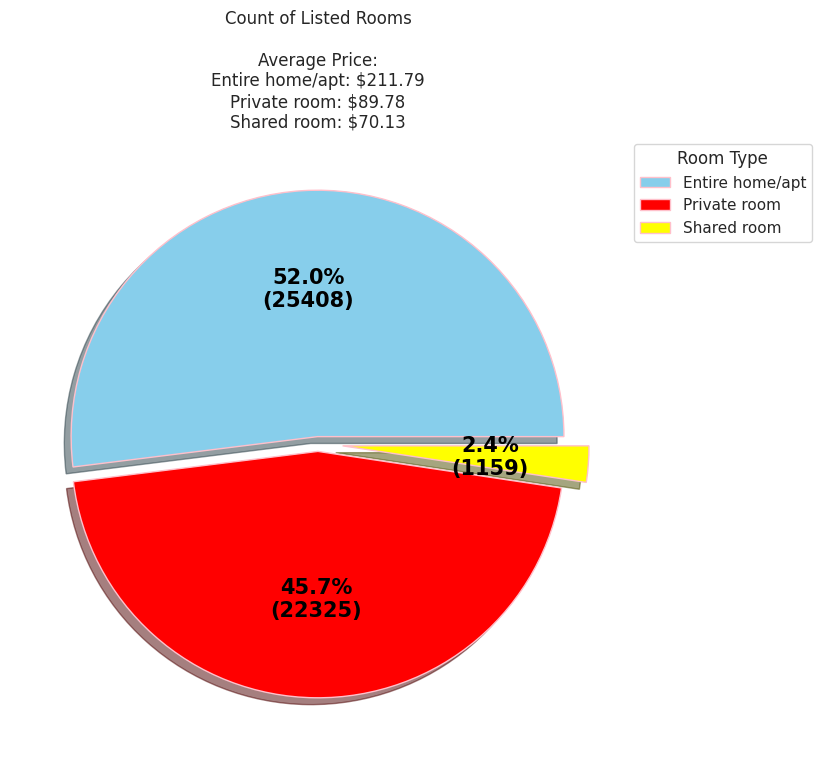

In [ ]:
room_type_count = df['room_type'].value_counts()

# Calculate the average price for each room type
room_type_avg_price = df.groupby('room_type')['price'].mean()

# Creating Dataset
room_type = room_type_count.index
data = room_type_count.values

# Creating color parameters
colors = ("skyblue", "red", "yellow",)

# Creating explode data
explode = (0.03, 0.03, 0.1)

# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "pink"}

# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100. * sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating Pie Chart
fig, airbnb_pie_chart = plt.subplots(figsize=(12, 8))
wedges, texts, autotexts = airbnb_pie_chart.pie(data, autopct=lambda pct: func(pct, data),
                                                explode=explode,
                                                shadow=True,
                                                colors=colors,
                                                startangle=0,
                                                wedgeprops=wp,
                                                textprops=dict(color="black"))

# Adding legend
airbnb_pie_chart.legend(wedges, room_type,
                        title="Room Type",
                        loc="upper left",
                        bbox_to_anchor=(1, 0., 0., 1))

# Set average price as the title
airbnb_pie_chart.set_title("Count of Listed Rooms\n\nAverage Price:\n" +
                           "\n".join([f"{room_type[i]}: ${room_type_avg_price[i]:.2f}"
                                      for i in range(len(room_type))]))

plt.setp(autotexts, size=15, weight="bold")

# Show the plot
plt.show()

#Conclusion


*   Manhattan is the most focused place in New York for hosts to do their business
*   Customers pay highest amount in Brooklyn,Queens and Manhattan that is 10,000 and lowest amount is 10$.

*   For the three types of room type (i.e. Entire home, Shared room, & Private room) average price of entire home is around $157, for shared room is around 60, and for private room is around 75.
* 'Entire home/apt' room type has the highest number of listing of 52% and ‘Shared Room’ is the least listed room type at only 2.4% in total.
* People stay for longer duration of time in Private rooms in Brooklyn and Manhattan.
*Count of listing by top 10 hosts is almost 2.5%(1270 listings) of the whole dataset.
*Top three host base on their turnover are Sonder(nyc),Red awning, Henry and best host is Sonder(nyc)
*More customer preferred Manhattan location for night stay then Brooklyn
*62.8% customer  spend night in Entire home and 2.2% spend night in Shared room